In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model

In [2]:
dataset_white = pd.read_csv("winequality-white.csv", sep=";")

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
train, test=train_test_split(dataset_white, test_size=.2)

In [7]:
train.shape[0] + test.shape[0] == dataset_white.shape[0]

True

In [9]:
variable_independiente = dataset_white["quality"].values

In [10]:
train = dataset_white.copy()
del train["quality"]

In [11]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [12]:
X_train, X_test, y_train, y_test = \
            train_test_split(train, variable_independiente, test_size=.2)

In [15]:
X_train.shape[0] + X_test.shape[0] == dataset_white.shape[0]

True

### Alcohol --> Quality

In [16]:
columnas = ["alcohol"]

In [17]:
X_train_filtrado = X_train.loc[:, columnas]
X_test_filtrado = X_test.loc[:, columnas]

In [18]:
lr_max_corr = linear_model.LinearRegression()
lr_max_corr.fit(X_train_filtrado, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
prediccion_max_corr = lr_max_corr.predict(X_test_filtrado)

In [20]:
from sklearn.metrics import mean_squared_error
import math

In [21]:
math.sqrt(mean_squared_error(y_test, prediccion_max_corr))

0.7777138276187449

In [22]:
lr_max_corr.coef_

array([0.31574379])

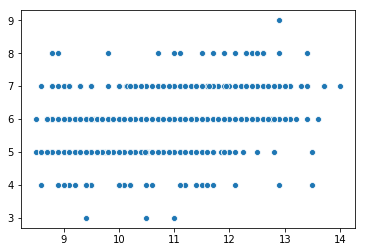

In [23]:
sb.scatterplot(X_test["alcohol"].values, y_test)

### densidy --> quality

In [26]:
columnas_min = ["density"]

In [35]:
X_train_filtrado2 = X_train.loc[:, columnas_min].values
X_test_filtrado2 = X_test.loc[:, columnas_min].values

In [36]:
lr_min_corr = linear_model.LinearRegression()
lr_min_corr.fit(X_train_filtrado2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
prediccion_min_corr = lr_min_corr.predict(X_test_filtrado2)

In [38]:
rmse_min = math.sqrt(mean_squared_error(y_test, prediccion_min_corr))

### ph --> quality

In [42]:
columnas_cero = ["pH"]

In [43]:
X_train_filtrado = X_train.loc[:, columnas_cero].values
X_test_filtrado = X_test.loc[:, columnas_cero].values

In [44]:
lr_cero_corr = linear_model.LinearRegression()
lr_cero_corr.fit(X_train_filtrado, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
prediccion_cero_corr = lr_cero_corr.predict(X_test_filtrado)

In [46]:
rmse_cero = math.sqrt(mean_squared_error(y_test, prediccion_cero_corr))

### Escalamiento

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()
scaler.fit(dataset_white)

C:\master\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [54]:
train = dataset_white.copy()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [55]:
del train["quality"]
#del train["index"]  -- saca error

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
train_escalado = pd.DataFrame